#ЗАДАНИЕ 2

#ВИЗУАЛЬНЫЙ АНАЛИЗ ДАННЫХ


## **Цель работы:** изучить программные средства, используемые для визуализации данных.


###Изучаемые вопросы:
* установка и настройка matplotlib;
* установка и настройка seaborn;
* изучение основных типов графиков библиотеки matplotlib;
* изучение основных типов графиков библиотеки seaborn;
* получение навыков анализа данных по визуальным представлениям данных.

###Датасет – cancer.csv

###Набор разработан для прогнозирования на основе различных признаков возникновения рецидива рака груди после прохождения некоторых видов лечения.

###Атрибуты:
* age – возраст пациента
* menopause – менопаузальный статус пациенток
* tumor-size – информация о размере опухоли
 inv-nodes – информация о количестве подмышечных лимфатических узлов,
пораженных или пораженных раком молочной железы
* node-caps – информация о наличии или отсутствии инкапсуляции или вовлеченности опухоли в лимфатические узлы
* deg-malig – степень злокачественности или тяжесть опухоли
* breast – расположение опухоли в груди
* breast-quad – информация о конкретном квадранте или области груди, пораженной раком
* irradiat – получал ли пациент лучевую терапию в рамках лечения рака груди.
* Class – указывает, был ли у пациентки рецидив рака (recurrence-events) или не
было рецидива (целевая переменная).

**1. Импортируем необходимые библиотеки**

In [55]:
import pandas as pd
import matplotlib.pyplot as lpt
import seaborn as sns
import numpy as np

**2. Импортируем набор данных из файла employee.csv и поместим его в объект DataFrame**

In [56]:

# Load the dataset
# Note: The user mentionfed 'employee.csv' in the instructions, but the dataset description says 'cancer.csv'.
# I will use 'cancer.csv' as it matches the description.
try:
    df = pd.read_csv('drive/MyDrive/Colab Notebooks/cancer.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'drive/MyDrive/Colab Notebooks/cancer.csv' not found. Файл не найден.")

Dataset loaded successfully.


**3. Сводная информация по датафрейму**

Получим общую информацию о датафрейме, включая типы данных, количество непропущенных значений и использование памяти.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


**4. Визуализация количественных признаков**

Визуализируем распределение возраста и размера опухоли.

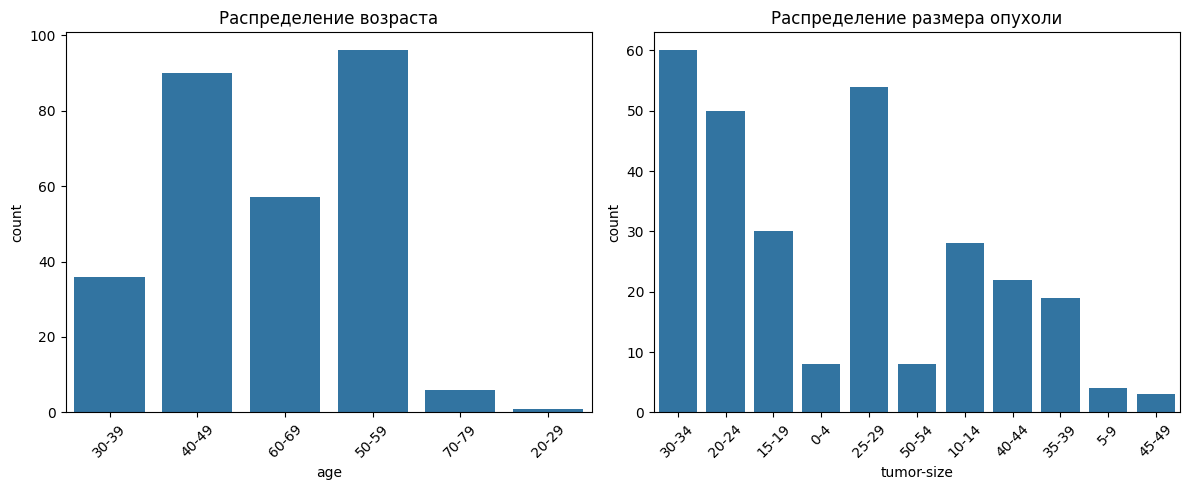

In [58]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='age')
plt.title('Распределение возраста')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='tumor-size')
plt.title('Распределение размера опухоли')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**5. Визуализация категориальных признаков**

Визуализируем распределение категориальных признаков, таких как менопаузальный статус, наличие инкапсуляции лимфоузлов, степень злокачественности, расположение опухоли и квадрант груди, а также наличие лучевой терапии и  рецидив.

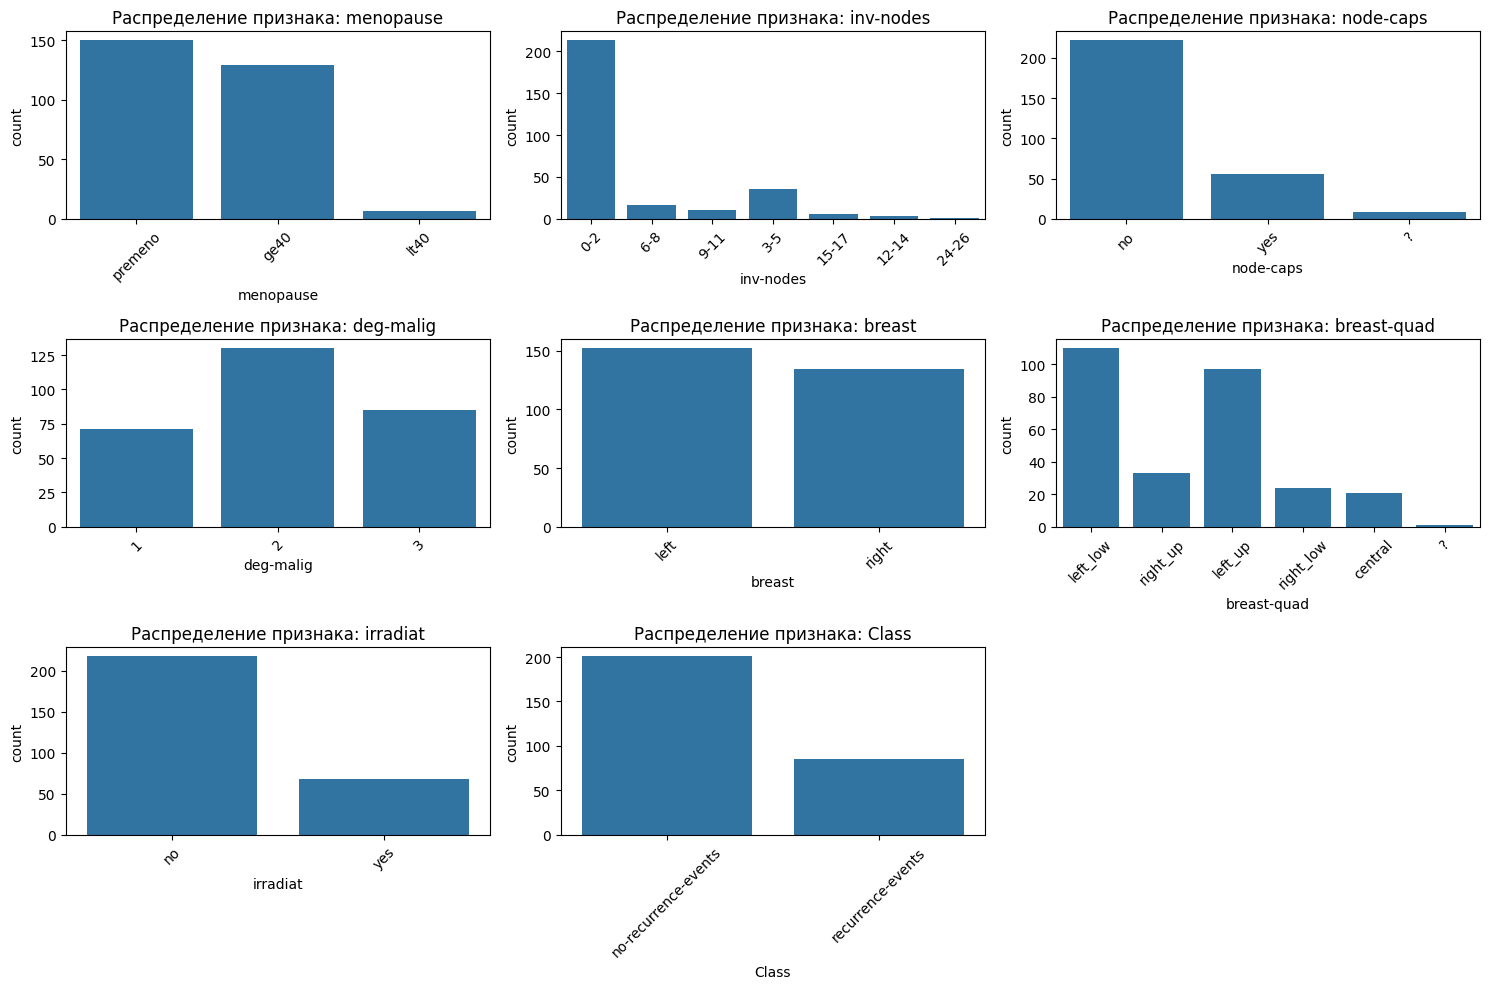

In [59]:
categorical_cols = ['menopause', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'Class']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Распределение признака: {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**6. Визуализация взаимосвязей признаков**

Исследуем взаимосвязи между категориальными признаками и целевой переменной 'Class' (рецидив рака). Для этого построим сетку графиков, где для каждого признака будет показано распределение пациентов по категориям с разделением по наличию или отсутствию рецидива. Это позволит визуально оценить, как различные категории признаков связаны с вероятностью рецидива.

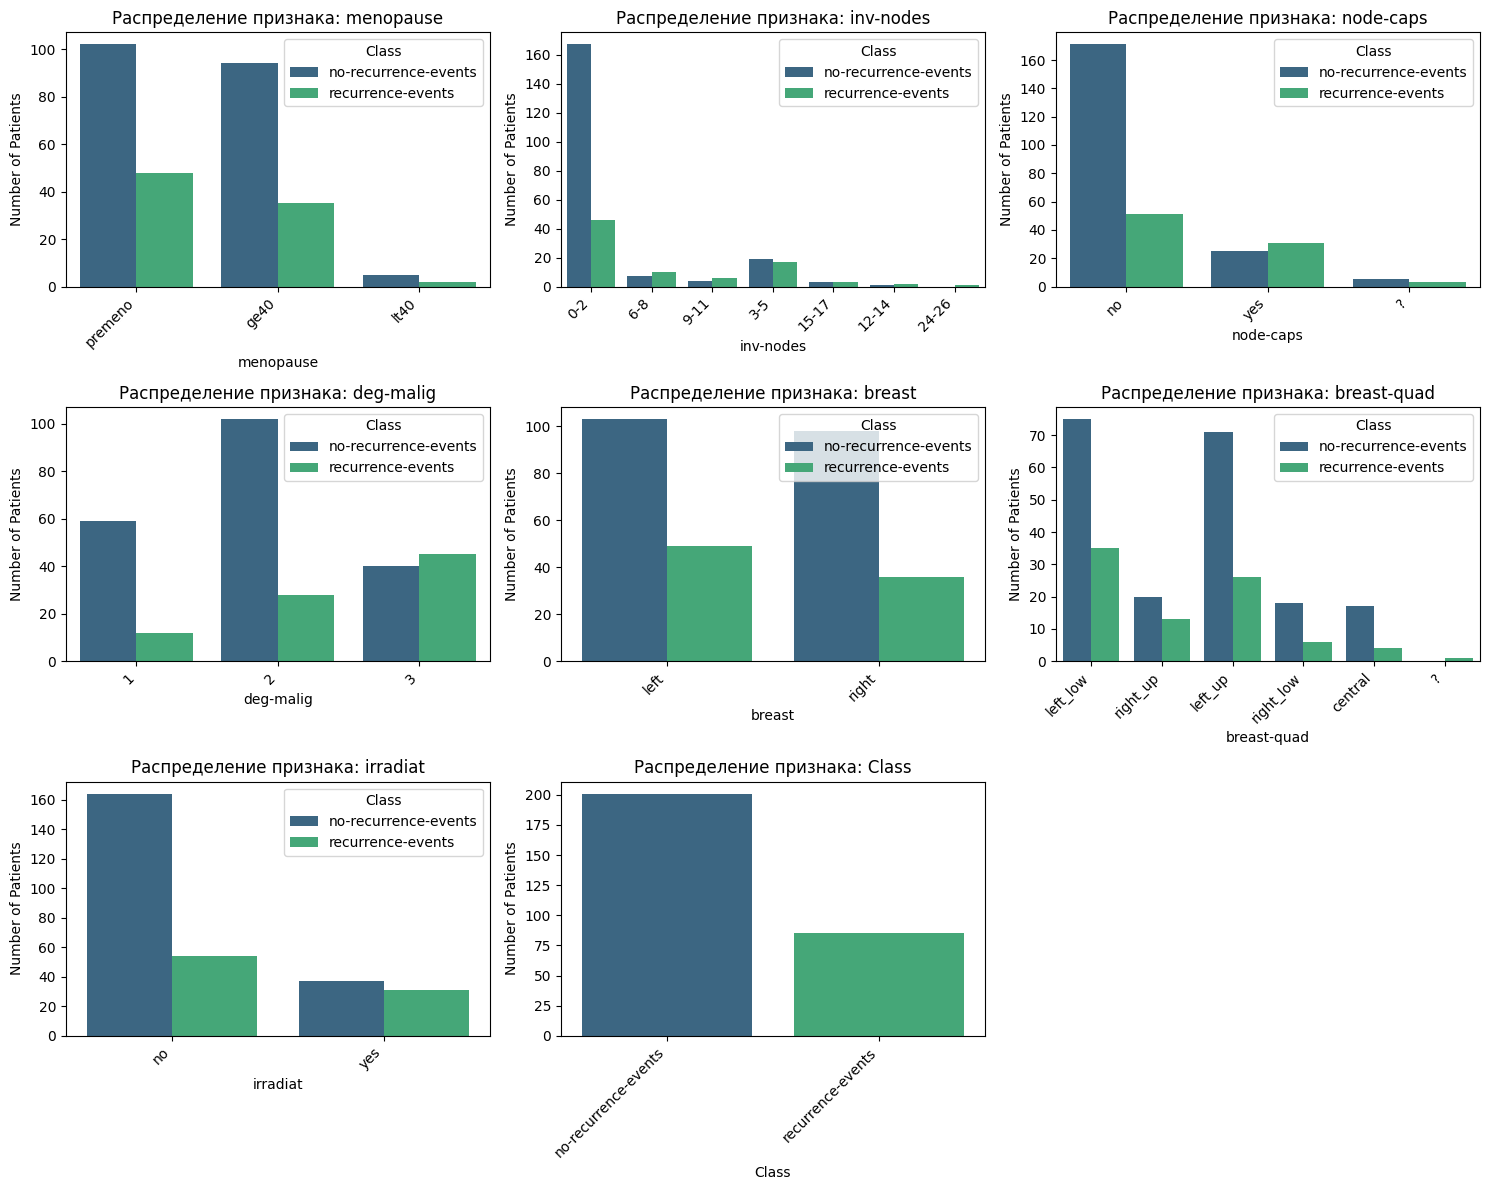

In [60]:
# Визуализация взаимосвязей признаков с целевой переменной 'Class' в виде сетки графиков

categorical_cols = ['menopause', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat', 'Class']

# Определяем количество строк и столбцов для сетки графиков
n_cols = 3  # Количество столбцов
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols # Автоматический расчет количества строк

plt.figure(figsize=(n_cols * 5, n_rows * 4)) # Регулируем общий размер фигуры

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='Class', palette='viridis')
    plt.title(f'Распределение признака: {col}')
    plt.xlabel(col) # Добавляем подписи осей для ясности
    plt.ylabel('Number of Patients') # Изменено на английский
    plt.xticks(rotation=45, ha='right') # Вращаем подписи по оси X для лучшей читаемости

# Удаляем пустые подграфики, если их количество не кратно n_cols
if len(categorical_cols) < n_rows * n_cols:
    for j in range(len(categorical_cols), n_rows * n_cols):
        plt.subplot(n_rows, n_cols, j + 1).set_visible(False)


plt.tight_layout() # Автоматически корректируем расположение подграфиков
plt.show()

**7. Корреляция признаков**

Для оценки корреляции между признаками необходимо преобразовать категориальные признаки в числовые. Используем One-Hot Encoding для этого. Затем рассчитаем и визуализируем матрицу корреляции.

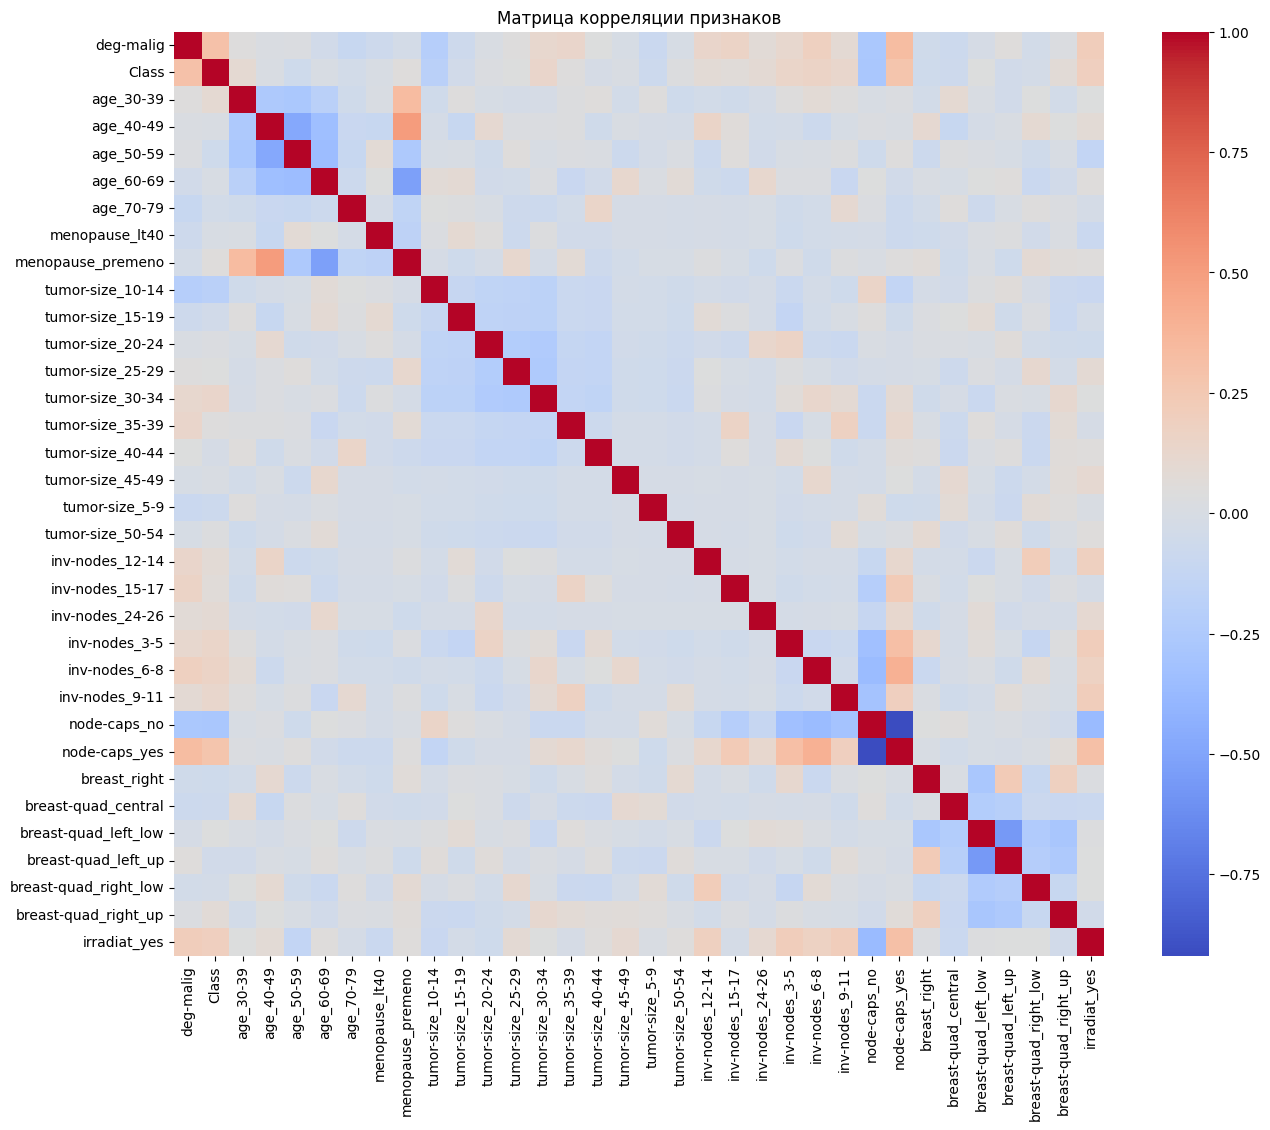

In [61]:
# Выбираем категориальные колонки для кодирования
categorical_cols_for_encoding = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat']

# Применяем One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_for_encoding, drop_first=True)

# Преобразуем целевую переменную 'Class' в числовую (0 для 'no-recurrence-events', 1 для 'recurrence-events')
df_encoded['Class'] = df_encoded['Class'].apply(lambda x: 1 if x == 'recurrence-events' else 0)

# Рассчитываем матрицу корреляции
correlation_matrix = df_encoded.corr()

# Визуализируем полную матрицу корреляции
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции признаков')
plt.show()

**8. Фильтрация и анализ корреляции**

На основе анализа полной матрицы корреляции из пункта 7, отфильтруем признаки, оставив только те, абсолютное значение корреляции которых с другими признаками или целевой переменной превышает определенный порог (0.2). Это позволит сосредоточиться на наиболее значимых взаимосвязях.

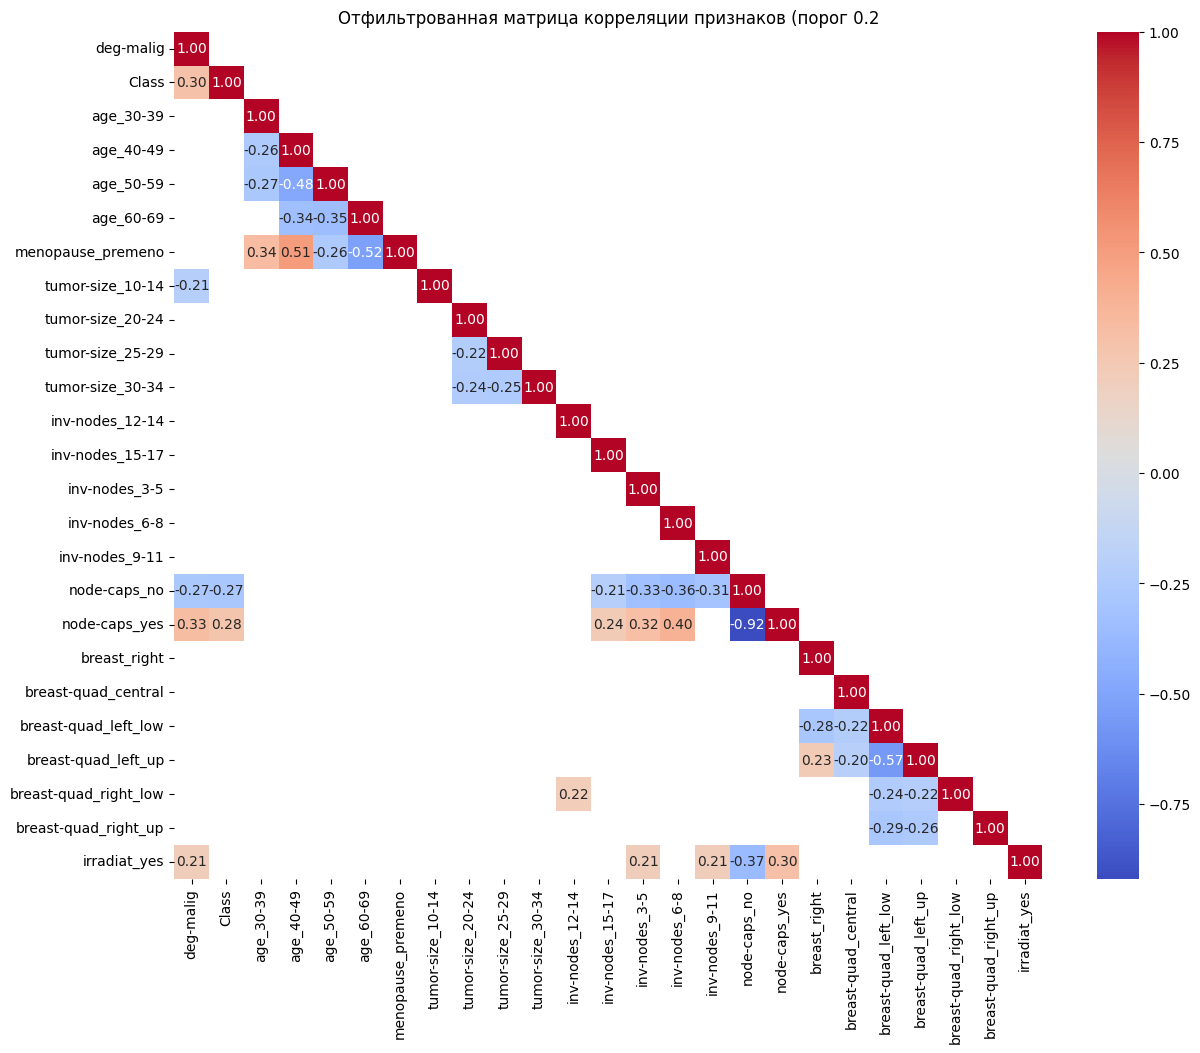

In [62]:
# Задаем порог корреляции
correlation_threshold = 0.2

# Создаем маску для значений, абсолютная корреляция которых больше или равна порогу
mask = abs(correlation_matrix) >= correlation_threshold

# Применяем маску к матрице корреляции, чтобы оставить только значимые значения
filtered_correlation_matrix_values = correlation_matrix.where(mask)

# Создаем маску для недиагональных элементов
not_diag_mask = ~np.eye(correlation_matrix.shape[0], dtype=bool)

# Применяем маску для недиагональных элементов к отфильтрованной по значению матрице
filtered_values_non_diag = filtered_correlation_matrix_values.where(not_diag_mask)

# Определяем строки/столбцы, у которых есть хотя бы одно не-NaN значение в НЕдиагональной части
meaningful_indices = filtered_values_non_diag.dropna(axis=0, how='all').index

# Фильтруем исходную матрицу корреляции, оставляя только эти "информативные" строки и столбцы
# Берем только строки и столбцы, которые остались после фильтрации недиагональных значимых значений
final_meaningful_correlation_matrix = correlation_matrix.loc[meaningful_indices, meaningful_indices]

# Применяем маску порога к матрице, чтобы скрыть значения ниже порога
final_meaningful_correlation_matrix = final_meaningful_correlation_matrix.where(abs(final_meaningful_correlation_matrix) >= correlation_threshold)

# Создаем маску для верхней треугольной части
mask_upper_without_diag_final = np.triu(np.ones_like(final_meaningful_correlation_matrix, dtype=bool), k=1)

# Визуализируем матрицу корреляци
plt.figure(figsize=(14, 11))
sns.heatmap(final_meaningful_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask_upper_without_diag_final)
plt.title(f'Отфильтрованная матрица корреляции признаков (порог {correlation_threshold}')
plt.show()